In [47]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [72]:
# Target User Accounts
target_user = ("@BBCWorld", "@CBSNews", "@CNN", '@FoxNews', '@nytimes')


# List for dictionaries of results
results_list = []

#Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
user_list = []

# Counter
counter = 1

# Loop through each user
for user in target_user:

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, page=x)

        # Loop through all tweets 
        for tweet in public_tweets:
        
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
        
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            user_list.append(user)

            # Add to counter 
            counter += 1
            
# Create a dictionary of results
user_results = {
    "Username": user,
    "Compound Score": (compound_list),
    "Postive Score": (positive_list),
    "Neutral Score": (neutral_list),
    "Negative Score": (negative_list),
    "Tweets Ago": counter,
    }

In [73]:
results_df = pd.DataFrame(user_results).set_index('Username').round(3)
results_df

,Compound Score,Negative Score,Neutral Score,Postive Score,Tweets Ago
Username,,,,,
@nytimes,0.000,0.000,1.000,0.000,501
@nytimes,0.586,0.000,0.725,0.275,501
@nytimes,-0.572,0.346,0.654,0.000,501
@nytimes,0.000,0.000,1.000,0.000,501
@nytimes,-0.402,0.105,0.895,0.000,501
@nytimes,0.000,0.000,1.000,0.000,501
@nytimes,0.000,0.000,1.000,0.000,501
@nytimes,0.000,0.000,1.000,0.000,501
@nytimes,0.572,0.000,0.861,0.139,501


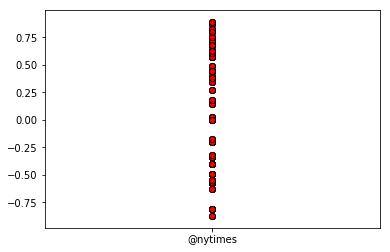

In [58]:
plt.scatter(results_df.index, results_df['Compound Score'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)